# MIMIC-IV Data Visualization

In [38]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Set file paths
data_path = '../data/'
admissions_file = os.path.join(data_path, 'hosp/admissions.csv.gz')
patients_file = os.path.join(data_path, 'hosp/patients.csv.gz')
transfers_file = os.path.join(data_path, 'hosp/transfers.csv.gz')
labs_file = os.path.join(data_path, 'hosp/labevents.csv.gz')
procedures_file = os.path.join(data_path, 'hosp/procedures_icd.csv.gz')
prescriptions_file = os.path.join(data_path, 'hosp/prescriptions.csv.gz')

In [3]:
# Load datasets
admissions = pd.read_csv(admissions_file, compression='gzip')
patients = pd.read_csv(patients_file, compression='gzip')
transfers = pd.read_csv(transfers_file, compression='gzip')
# labs = pd.read_csv(labs_file, compression='gzip')
procedures = pd.read_csv(procedures_file, compression='gzip')
# prescriptions = pd.read_csv(prescriptions_file, compression='gzip')

In [4]:
# Explore admissions data
print("Admissions Dataset Head:")
print(admissions.head())
print("\nAdmissions Dataset Info:")
admissions.info()

Admissions Dataset Head:
   subject_id   hadm_id            admittime            dischtime deathtime  \
0    10000032  22595853  2180-05-06 22:23:00  2180-05-07 17:15:00       NaN   
1    10000032  22841357  2180-06-26 18:27:00  2180-06-27 18:49:00       NaN   
2    10000032  25742920  2180-08-05 23:44:00  2180-08-07 17:50:00       NaN   
3    10000032  29079034  2180-07-23 12:35:00  2180-07-25 17:55:00       NaN   
4    10000068  25022803  2160-03-03 23:16:00  2160-03-04 06:26:00       NaN   

   admission_type admit_provider_id      admission_location  \
0          URGENT            P49AFC  TRANSFER FROM HOSPITAL   
1        EW EMER.            P784FA          EMERGENCY ROOM   
2        EW EMER.            P19UTS          EMERGENCY ROOM   
3        EW EMER.            P06OTX          EMERGENCY ROOM   
4  EU OBSERVATION            P39NWO          EMERGENCY ROOM   

  discharge_location insurance language marital_status   race  \
0               HOME  Medicaid  English        WIDOWED  

In [5]:
print(f'Number of patients: {admissions.subject_id.nunique()}')
print(f'Number of hospitalizations: {admissions.hadm_id.nunique()}')

Number of patients: 223452
Number of hospitalizations: 546028


In [6]:
print(f'Number of patients who died: {admissions[~admissions.deathtime.isnull()].subject_id.nunique()}')
print(f'Number of hospitalizations ended by death: {admissions[admissions.hospital_expire_flag==1].shape[0]}')

Number of patients who died: 11789
Number of hospitalizations ended by death: 11801


In [ ]:
admissions.hospire_flag.value_counts(dropna=False)pital_ex

0    534227
1     11801
Name: hospital_expire_flag, dtype: int64

In [8]:
# Explore patients data
print("\nPatients Dataset Head:")
print(patients.head())
print("\nPatients Dataset Info:")
patients.info()


Patients Dataset Head:
   subject_id gender  anchor_age  anchor_year anchor_year_group         dod
0    10000032      F          52         2180       2014 - 2016  2180-09-09
1    10000048      F          23         2126       2008 - 2010         NaN
2    10000058      F          33         2168       2020 - 2022         NaN
3    10000068      F          19         2160       2008 - 2010         NaN
4    10000084      M          72         2160       2017 - 2019  2161-02-13

Patients Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364627 entries, 0 to 364626
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   subject_id         364627 non-null  int64 
 1   gender             364627 non-null  object
 2   anchor_age         364627 non-null  int64 
 3   anchor_year        364627 non-null  int64 
 4   anchor_year_group  364627 non-null  object
 5   dod                38301 non-null   object
dt

In [9]:
# Merge datasets for combined analysis
merged_data = pd.merge(admissions, patients, on='subject_id', how='inner')

# Initial exploration
print("\nMerged Dataset Head:")
print(merged_data.head())


Merged Dataset Head:
   subject_id   hadm_id            admittime            dischtime deathtime  \
0    10000032  22595853  2180-05-06 22:23:00  2180-05-07 17:15:00       NaN   
1    10000032  22841357  2180-06-26 18:27:00  2180-06-27 18:49:00       NaN   
2    10000032  25742920  2180-08-05 23:44:00  2180-08-07 17:50:00       NaN   
3    10000032  29079034  2180-07-23 12:35:00  2180-07-25 17:55:00       NaN   
4    10000068  25022803  2160-03-03 23:16:00  2160-03-04 06:26:00       NaN   

   admission_type admit_provider_id      admission_location  \
0          URGENT            P49AFC  TRANSFER FROM HOSPITAL   
1        EW EMER.            P784FA          EMERGENCY ROOM   
2        EW EMER.            P19UTS          EMERGENCY ROOM   
3        EW EMER.            P06OTX          EMERGENCY ROOM   
4  EU OBSERVATION            P39NWO          EMERGENCY ROOM   

  discharge_location insurance  ... marital_status   race  \
0               HOME  Medicaid  ...        WIDOWED  WHITE   
1 

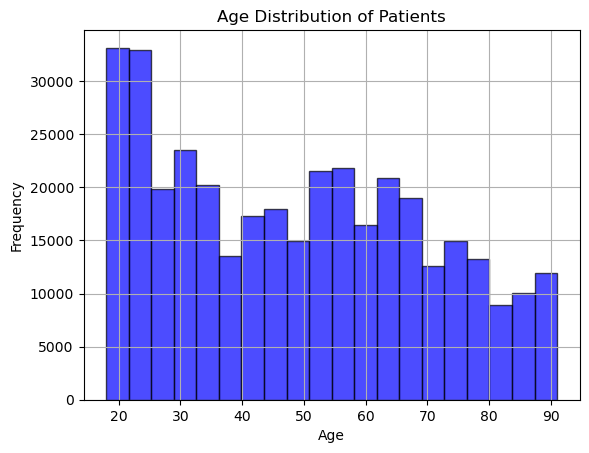

In [10]:
# Visualization
# Distribution of patient ages
patients['anchor_age'].hist(bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

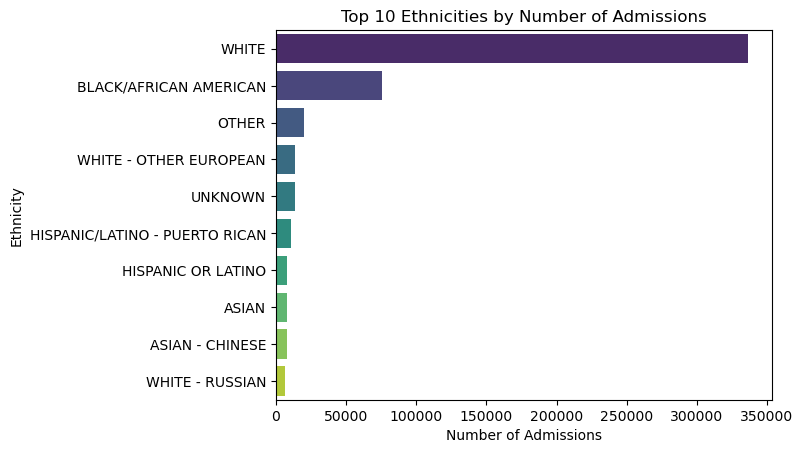

In [11]:
# Admissions by ethnicity
ethnicity_counts = admissions['race'].value_counts().head(10)
sns.barplot(x=ethnicity_counts.values, y=ethnicity_counts.index, palette='viridis')
plt.title('Top 10 Ethnicities by Number of Admissions')
plt.xlabel('Number of Admissions')
plt.ylabel('Ethnicity')
plt.show()

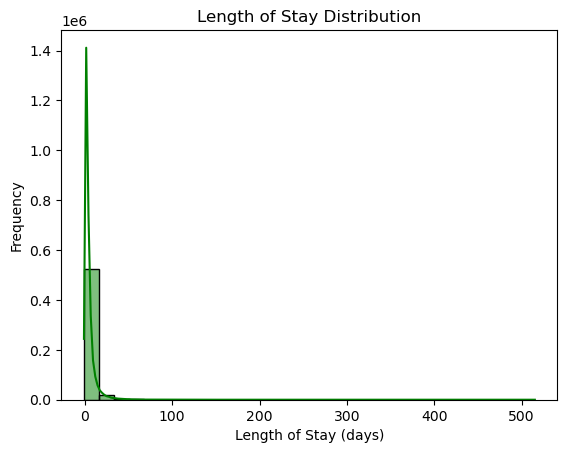

In [12]:
# Length of stay analysis
admissions['length_of_stay'] = (pd.to_datetime(admissions['dischtime']) - pd.to_datetime(admissions['admittime'])).dt.days
sns.histplot(admissions['length_of_stay'], bins=30, kde=True, color='green')
plt.title('Length of Stay Distribution')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Frequency')
plt.show()

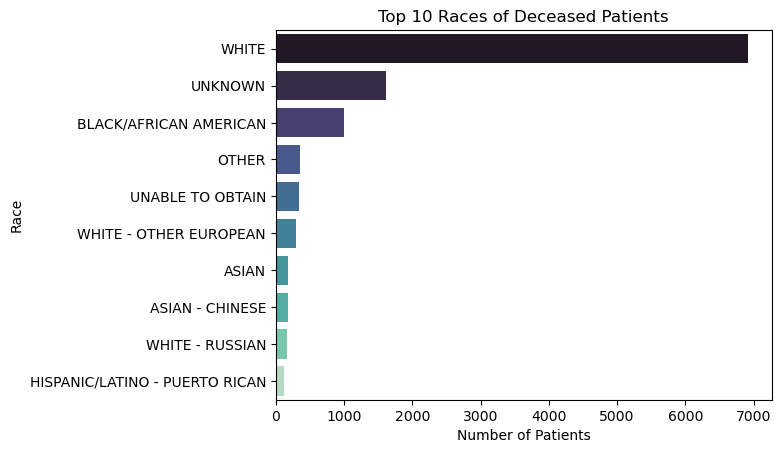

In [13]:
# Top 10 races of patients who died
deceased_patients = merged_data[merged_data['hospital_expire_flag'] == 1]
race_counts = deceased_patients['race'].value_counts().head(10)
sns.barplot(x=race_counts.values, y=race_counts.index, palette='mako')
plt.title('Top 10 Races of Deceased Patients')
plt.xlabel('Number of Patients')
plt.ylabel('Race')
plt.show()

In [48]:
# Number of admissions per patient
admissions_per_subject = admissions.groupby('subject_id').size().reset_index(name='admission_count')

dead_patients = admissions[admissions.hospital_expire_flag==1].subject_id.unique()
admissions_per_subject['is_dead'] = 0
admissions_per_subject.loc[admissions_per_subject.subject_id.isin(dead_patients), 'is_dead'] = 1

print("\nNumber of Admission Per Patient:")
print(admissions_per_subject.head())


Number of Admission Per Patient:
   subject_id  admission_count  is_dead
0    10000032                4        0
1    10000068                1        0
2    10000084                2        0
3    10000108                1        0
4    10000117                2        0


In [49]:
admissions_per_subject.is_dead.value_counts(dropna=False)

0    211652
1     11800
Name: is_dead, dtype: int64

In [50]:
admissions_per_subject.describe()

,subject_id,admission_count,is_dead
count,2.234520e+05,223452.000000,223452.000000
mean,1.501524e+07,2.443603,0.052808
std,2.885229e+06,3.574410,0.223650
min,1.000003e+07,1.000000,0.000000
25%,1.251286e+07,1.000000,0.000000
50%,1.502379e+07,1.000000,0.000000
75%,1.751682e+07,3.000000,0.000000
max,1.999999e+07,238.000000,1.000000


In [25]:
admissions_per_subject.admission_count.value_counts(dropna=False)

1      123289
2       44123
3       20108
4       11172
5        6629
        ...  
163         1
78          1
79          1
105         1
72          1
Name: admission_count, Length: 97, dtype: int64

In [53]:
admissions_per_subject[admissions_per_subject.is_dead==1].admission_count.value_counts(dropna=False)

1      5256
2      1840
3      1115
4       807
5       580
6       366
7       316
8       249
9       220
10      161
11      130
12      114
13      104
14       78
16       59
15       58
18       44
17       42
19       27
23       25
20       23
22       21
21       20
24       15
26       12
28       10
25        9
27        9
30        8
32        8
33        7
36        6
37        6
35        5
34        4
41        4
39        4
40        3
29        3
44        3
31        3
52        3
64        2
45        2
38        2
63        2
42        2
77        2
55        1
49        1
78        1
48        1
59        1
50        1
142       1
46        1
53        1
47        1
72        1
Name: admission_count, dtype: int64

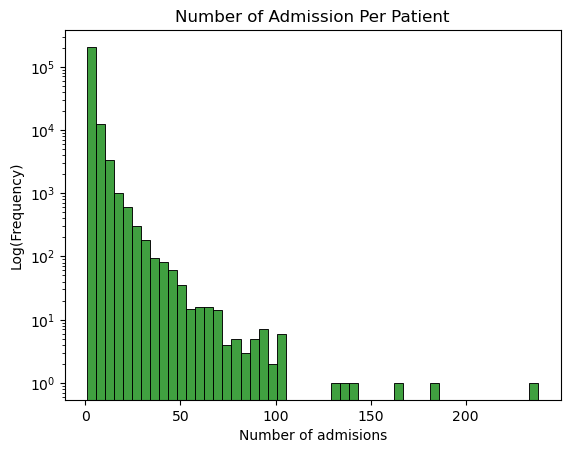

In [55]:
sns.histplot(admissions_per_subject[admissions_per_subject['admission_count']>0].admission_count, bins=50, kde=False, color='green', log_scale=(False, True))
plt.title('Number of Admission Per Patient')
plt.xlabel('Number of admisions')
plt.ylabel('Log(Frequency)')
# plt.yscale('log')
plt.show()

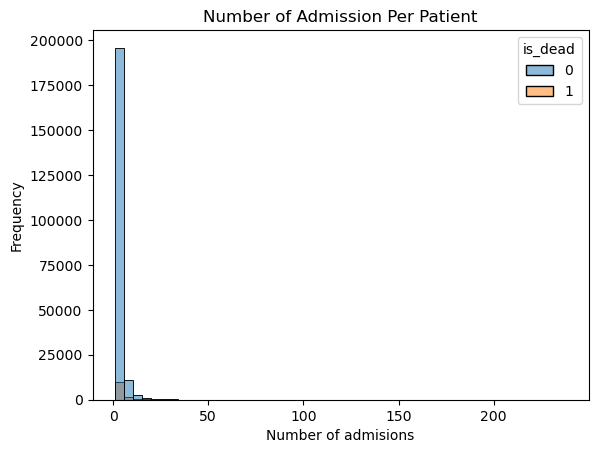

In [57]:
sns.histplot(admissions_per_subject, x='admission_count', bins=50, kde=False, color='green', log_scale=(False, False), hue='is_dead')
plt.title('Number of Admission Per Patient')
plt.xlabel('Number of admisions')
plt.ylabel('Frequency')
# plt.yscale('log')
plt.show()

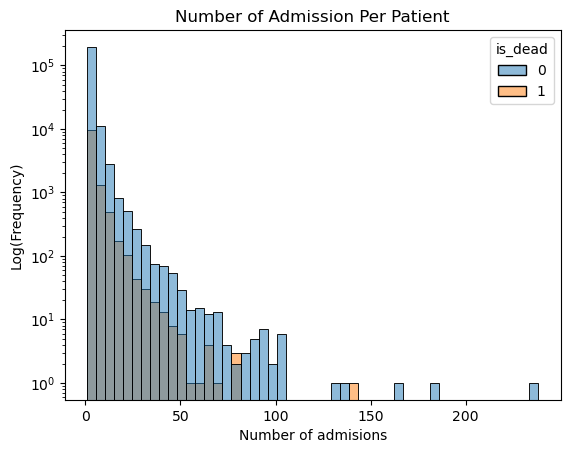

In [58]:
sns.histplot(admissions_per_subject, x='admission_count', bins=50, kde=False, color='green', log_scale=(False, True), hue='is_dead')
plt.title('Number of Admission Per Patient')
plt.xlabel('Number of admisions')
plt.ylabel('Log(Frequency)')
# plt.yscale('log')
plt.show()

In [14]:
# Analysis 1: Number of transfers per admission
transfers_per_admission = transfers.groupby('hadm_id').size().reset_index(name='transfer_count')
print("\nNumber of Transfers Per Admission:")
print(transfers_per_admission.head())


Number of Transfers Per Admission:
      hadm_id  transfer_count
0  20000019.0               3
1  20000024.0               3
2  20000034.0               2
3  20000041.0               3
4  20000045.0               7


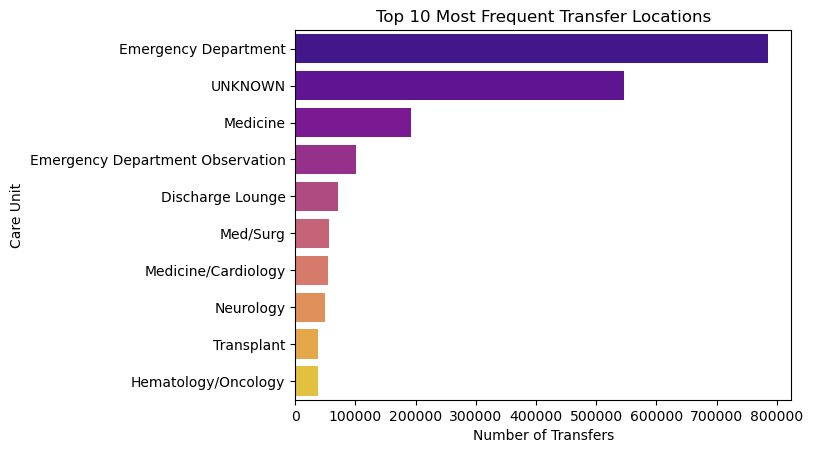

In [17]:
# Most frequent transfer locations
most_frequent_transfers = transfers['careunit'].value_counts().head(10)
sns.barplot(x=most_frequent_transfers.values, y=most_frequent_transfers.index, palette='plasma')
plt.title('Top 10 Most Frequent Transfer Locations')
plt.xlabel('Number of Transfers')
plt.ylabel('Care Unit')
plt.show()

In [15]:
# Analysis 2: Average length of stay by admission type
admissions['length_of_stay'] = (pd.to_datetime(admissions['dischtime']) - pd.to_datetime(admissions['admittime'])).dt.total_seconds() / (24 * 3600)
average_los_by_admission_type = admissions.groupby('admission_type')['length_of_stay'].mean().reset_index()
print("\nAverage Length of Stay by Admission Type:")
print(average_los_by_admission_type)


Average Length of Stay by Admission Type:
                admission_type  length_of_stay
0       AMBULATORY OBSERVATION        1.117512
1                 DIRECT EMER.        7.209848
2           DIRECT OBSERVATION        1.310851
3                     ELECTIVE        6.295253
4               EU OBSERVATION        0.995530
5                     EW EMER.        5.906088
6            OBSERVATION ADMIT        6.792862
7  SURGICAL SAME DAY ADMISSION        4.515617
8                       URGENT        6.999074


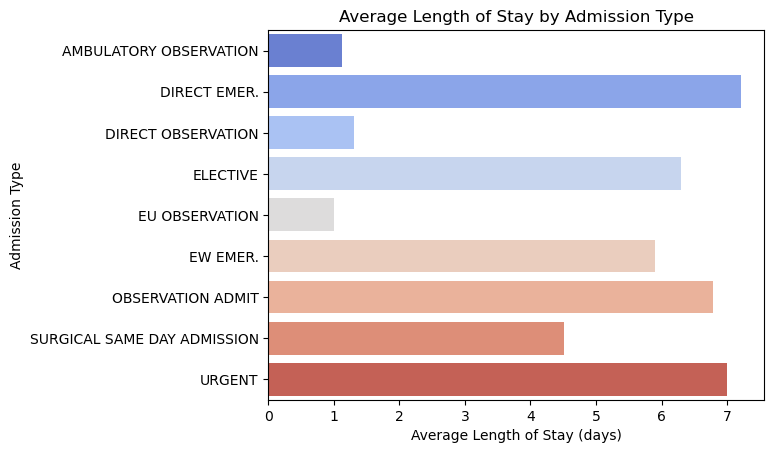

In [16]:
sns.barplot(x='length_of_stay', y='admission_type', data=average_los_by_admission_type, palette='coolwarm')
plt.title('Average Length of Stay by Admission Type')
plt.xlabel('Average Length of Stay (days)')
plt.ylabel('Admission Type')
plt.show()